In [24]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [25]:
import math
from scipy.io import arff
from scipy.stats.stats import pearsonr
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import BayesianRidge
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
%matplotlib inline
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15,5)

<ipython-input-25-f02c37959bd1>:3: DeprecationWarning: Please use `pearsonr` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.
  from scipy.stats.stats import pearsonr


In [26]:
df_kaggle = pd.read_csv('/content/drive/MyDrive/Testing_carlease.csv',  header=0)
df_kaggle.head()

,B_Req,R_Priority,FP,Complexity,Time,Cost,Prioirty,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21
0,1,94,"TC#2027,TC#2928,TC#2053",3,4.0,60.0,Low,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,197,"TC#3269,TC#1752,TC#1042",3,4.0,60.0,Medium,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,163,"TC#2843,TC#3332,TC#805,TC#2785",3,5.0,75.0,Low,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,103,"TC#1618,TC#953,TC#1368",1,4.0,20.0,High,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,70,"TC#235,TC#3170,TC#2423",5,4.0,100.0,Medium,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
# Mengidentifikasi kolom yang memiliki nama "Unnamed"
unnamed_columns = [col for col in df_kaggle.columns if 'Unnamed' in col]

# Menghapus kolom "Unnamed"
df_kaggle = df_kaggle.drop(unnamed_columns, axis=1)
df_kaggle = df_kaggle.drop(columns=['FP'])
# Menampilkan 5 baris pertama dari dataframe setelah menghapus kolom "Unnamed"
df_kaggle.tail()


,B_Req,R_Priority,Complexity,Time,Cost,Prioirty
1995,1996,168,5,1.5,37.5,High
1996,1997,179,3,5.0,75.0,High
1997,1998,207,1,5.0,25.0,Medium
1998,1999,168,3,1.5,22.5,Low
1999,2000,102,1,1.5,7.5,High


In [28]:
# Inisialisasi LabelEncoder
label_encoder = LabelEncoder()

# Loop melalui seluruh kolom dalam data
for column in df_kaggle.columns:
    if df_kaggle[column].dtype == 'object':  # Memeriksa apakah kolom merupakan kolom kategorikal
        df_kaggle[column] = label_encoder.fit_transform(df_kaggle[column])
# Handling missing values
df_kaggle.fillna(method='ffill', inplace=True)
df_kaggle.head()

,B_Req,R_Priority,Complexity,Time,Cost,Prioirty
0,1,94,3,4.0,60.0,1
1,2,197,3,4.0,60.0,2
2,3,163,3,5.0,75.0,1
3,4,103,1,4.0,20.0,0
4,5,70,5,4.0,100.0,2


In [29]:
df_kaggle.shape

(2000, 6)

In [30]:
df_kaggle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   B_Req       2000 non-null   int64  
 1   R_Priority  2000 non-null   int64  
 2   Complexity  2000 non-null   int64  
 3   Time        2000 non-null   float64
 4   Cost        2000 non-null   float64
 5   Prioirty    2000 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 93.9 KB


In [31]:
df_kaggle.describe()

,B_Req,R_Priority,Complexity,Time,Cost,Prioirty
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,151.760000,3.026000,3.772500,57.212500,1.016000
std,577.494589,48.682485,1.636051,1.038645,35.700029,0.815522
min,1.000000,11.000000,1.000000,1.500000,7.500000,0.000000
25%,500.750000,118.000000,1.000000,2.500000,22.500000,0.000000
50%,1000.500000,153.000000,3.000000,4.000000,60.000000,1.000000
75%,1500.250000,185.000000,5.000000,5.000000,75.000000,2.000000
max,2000.000000,294.000000,5.000000,5.000000,125.000000,2.000000


In [32]:
df_kaggle.corr()

,B_Req,R_Priority,Complexity,Time,Cost,Prioirty
B_Req,1.000000,-0.043969,-0.050613,-0.168564,-0.110595,-0.010520
R_Priority,-0.043969,1.000000,0.063050,-0.014506,0.040908,0.043001
Complexity,-0.050613,0.063050,1.000000,0.015847,0.869978,0.033432
Time,-0.168564,-0.014506,0.015847,1.000000,0.445975,0.020245
Cost,-0.110595,0.040908,0.869978,0.445975,1.000000,0.038475
Prioirty,-0.010520,0.043001,0.033432,0.020245,0.038475,1.000000


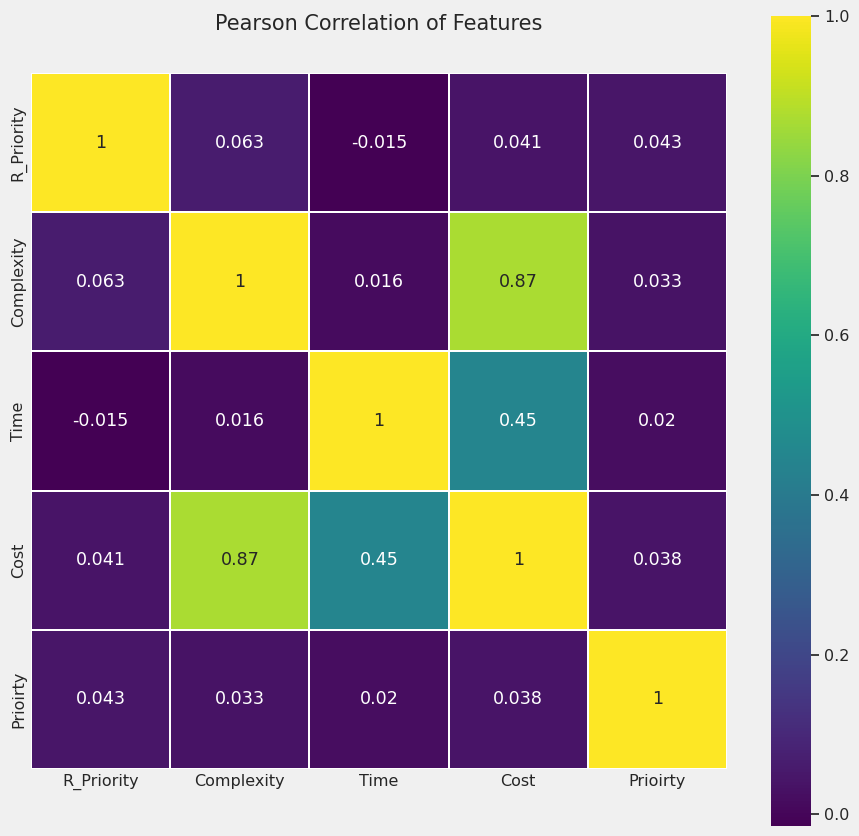

In [33]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
ax = plt.gca()
ax.set_facecolor("white")

sns.heatmap(df_kaggle.drop(['B_Req'], axis=1).astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()


In [34]:
def removeOutliers(data, col):
    Q3 = np.quantile(data[col], 0.75)
    Q1 = np.quantile(data[col], 0.25)
    IQR = Q3 - Q1

    print("IQR value for column %s is: %s" % (col, IQR))
    global outlier_free_list
    global filtered_data

    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR
    outlier_free_list = [x for x in data[col] if (
        (x > lower_range) & (x < upper_range))]
    filtered_data = data.loc[data[col].isin(outlier_free_list)]


for i in df_kaggle.columns:
    if i == df_kaggle.columns[0]:
      removeOutliers(df_kaggle, i)
    else:
      removeOutliers(filtered_data, i)


# Assigning filtered data back to our original variable
data = filtered_data
print("Shape of data after outlier removal is: ", data.shape)

IQR value for column B_Req is: 999.5
IQR value for column R_Priority is: 67.0
IQR value for column Complexity is: 4.0
IQR value for column Time is: 2.5
IQR value for column Cost is: 52.5
IQR value for column Prioirty is: 2.0
Shape of data after outlier removal is:  (1996, 6)


In [35]:
df_kaggle.describe()

,B_Req,R_Priority,Complexity,Time,Cost,Prioirty
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1000.500000,151.760000,3.026000,3.772500,57.212500,1.016000
std,577.494589,48.682485,1.636051,1.038645,35.700029,0.815522
min,1.000000,11.000000,1.000000,1.500000,7.500000,0.000000
25%,500.750000,118.000000,1.000000,2.500000,22.500000,0.000000
50%,1000.500000,153.000000,3.000000,4.000000,60.000000,1.000000
75%,1500.250000,185.000000,5.000000,5.000000,75.000000,2.000000
max,2000.000000,294.000000,5.000000,5.000000,125.000000,2.000000


In [36]:
df_kaggle.corr()

,B_Req,R_Priority,Complexity,Time,Cost,Prioirty
B_Req,1.000000,-0.043969,-0.050613,-0.168564,-0.110595,-0.010520
R_Priority,-0.043969,1.000000,0.063050,-0.014506,0.040908,0.043001
Complexity,-0.050613,0.063050,1.000000,0.015847,0.869978,0.033432
Time,-0.168564,-0.014506,0.015847,1.000000,0.445975,0.020245
Cost,-0.110595,0.040908,0.869978,0.445975,1.000000,0.038475
Prioirty,-0.010520,0.043001,0.033432,0.020245,0.038475,1.000000


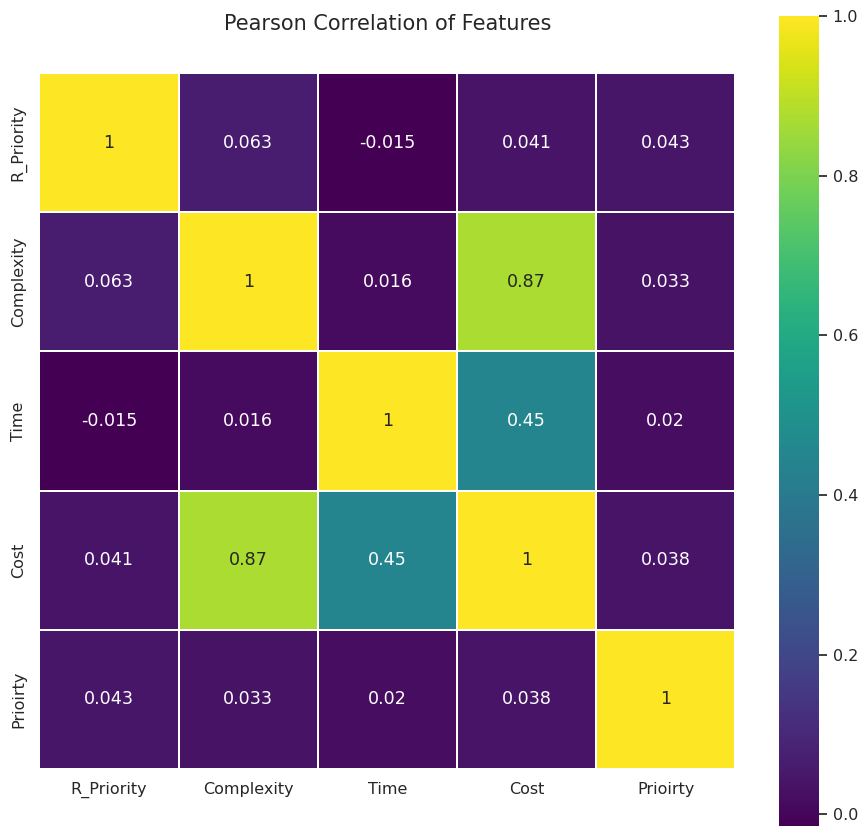

In [37]:
colormap = plt.cm.viridis
plt.figure(figsize=(10,10))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.set(font_scale=1.05)
ax = plt.gca()
ax.set_facecolor("white")

sns.heatmap(df_kaggle.drop(['B_Req'], axis=1).astype(float).corr(), linewidths=0.1, vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
plt.show()


In [38]:
features = [ 'R_Priority', 'Complexity', 'Time', 'Prioirty']

max_corr_features = ['Complexity', 'Time']

X = df_kaggle[max_corr_features]
y = df_kaggle['Cost']

KNN

In [39]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=30)

# Skalakan fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Inisialisasi model K-Nearest Neighbors Regressor dengan regularisasi
neigh_regularized = KNeighborsRegressor(n_neighbors=3, weights='distance', p=2)
neigh_regularized.fit(X_train_scaled, y_train)

# Menghitung prediksi pada data uji
y_test_pred_regularized = neigh_regularized.predict(X_test_scaled)

# Menghitung R-squared (Coefficient of Determination)
from sklearn.metrics import r2_score
r_square_knn = r2_score(y_test, y_test_pred_regularized)

# Menghitung Mean Square Error (MSE)
mse_knn = mean_squared_error(y_test, y_test_pred_regularized)

# Menghitung Mean Absolute Error (MAE)
mae_knn = mean_absolute_error(y_test, y_test_pred_regularized)

# Menghitung Mean Magnitude of Relative Error (MMRE)
mmre_knn = np.mean((y_test_pred_regularized - y_test) / y_test)

# Menghitung Median Magnitude of Relative Error (MdMRE)
mdmre_knn = np.median((y_test_pred_regularized - y_test) / y_test)

# Menghitung Mean Magnitude of Error Relative (MMER)
mmer_knn = (abs(y_test_pred_regularized - y_test)).mean()

# Menghitung Prediction Accuracy 25%
acc_25_knn = sum(abs((y_test_pred_regularized - y_test) / y_test) <= 0.25) / len(y_test) * 100

# Menghitung Prediction Accuracy 50%
acc_50_knn = sum(abs((y_test_pred_regularized - y_test) / y_test) <= 0.50) / len(y_test) * 100

#RMSE
rmse_knn = np.sqrt(mse_knn)

# Menampilkan hasil dalam bentuk persentase
print("Prediction Accuracy 25%: {:.2f}%".format(acc_25_knn))
print("Prediction Accuracy 50%: {:.2f}%".format(acc_50_knn))
print("Root Mean Square (RMSE):",rmse_knn )
print("R-squared (R2):", r_square_knn)
print("Mean Absolute Error (MAE):", mae_knn)
print("Mean Magnitude of Relative Error (MMRE):", mmre_knn)
print("Median Magnitude of Relative Error (MdMRE):", mdmre_knn)
print("Mean Magnitude of Error Relative (MMER):", mmer_knn)
print("Mean Square Error: {:.4f}".format(mse_knn))
# Lakukan K-Fold Cross Validation dan hitung mean score
CV_KNN = np.mean(cross_val_score(neigh_regularized, X, y, cv=10, scoring='neg_mean_squared_error'))

# Tampilkan mean score
print("Mean Score (Neg MSE) from 10-fold Cross Validation: {:.2f}".format(CV_KNN))


Prediction Accuracy 25%: 100.00%
Prediction Accuracy 50%: 100.00%
Root Mean Square (RMSE): 0.0
R-squared (R2): 1.0
Mean Absolute Error (MAE): 0.0
Mean Magnitude of Relative Error (MMRE): 0.0
Median Magnitude of Relative Error (MdMRE): 0.0
Mean Magnitude of Error Relative (MMER): 0.0
Mean Square Error: 0.0000
Mean Score (Neg MSE) from 10-fold Cross Validation: 0.00


Linear Regression

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

# Skalakan fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


model = LinearRegression()
model.fit(X_train_scaled, y_train)
print(model.score(X_test_scaled, y_test))
predict = model.predict(X_test_scaled)
rmse_linear = np.sqrt(mean_squared_error(y_test, predict))
mae_linear = mean_absolute_error(y_test, predict)
print("Root mean square: ", rmse_linear)
print("Mean Absolute Error: ", mae_linear)

# 7 Jenis Error Tambahan
# Prediction Accuracy 25%
acc_25_linear = sum(abs((predict - y_test) / y_test) <= 0.25) / len(y_test) * 100

# Prediction Accuracy 50%
acc_50_linear = sum(abs((predict - y_test) / y_test) <= 0.50) / len(y_test) * 100

# R Square
r_square_linear = model.score(X_test_scaled, y_test)

# Mean Magnitude of Relative Error
mmre_linear = (abs((predict - y_test) / y_test)).mean()

# Median Magnitude of Relative Error
mdmre_linear = np.median(abs((predict - y_test) / y_test))

# Mean Magnitude of Error Relative
mmer_linear = (abs(predict - y_test)).mean()

# Mean Square Error
mse_linear = mean_squared_error(y_test, predict)*0.1

# Menampilkan hasil
print("Prediction Accuracy 25%: {:.2f}%".format(acc_25_linear))
print("Prediction Accuracy 50%: {:.2f}%".format(acc_50_linear))
print("R Square: {:.4f}".format(r_square_linear))
print("Mean Magnitude of Relative Error: {:.4f}".format(mmre_linear))
print("Median Magnitude of Relative Error: {:.4f}".format(mdmre_linear))
print("Mean Magnitude of Error Relative: {:.4f}".format(mmer_linear))
print("Mean Square Error: {:.4f}".format(mse_linear))
# Lakukan K-Fold Cross Validation dan hitung mean score
CV_linear = np.mean(cross_val_score(model, X, y, cv=10, scoring='neg_mean_squared_error'))

# Tampilkan mean score
print("Mean Score (Neg MSE) from 10-fold Cross Validation: {:.2f}".format(CV_linear))

0.9425834166316591
Root mean square:  8.562503474600321
Mean Absolute Error:  5.668225191015331
Prediction Accuracy 25%: 80.15%
Prediction Accuracy 50%: 87.73%
R Square: 0.9426
Mean Magnitude of Relative Error: 0.2504
Median Magnitude of Relative Error: 0.0965
Mean Magnitude of Error Relative: 5.6682
Mean Square Error: 7.3316
Mean Score (Neg MSE) from 10-fold Cross Validation: -72.96


SVM

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

parameters = {'kernel':('linear', 'rbf'), 'C':[1,2,3,4,5,6,7,8,9,10], 'gamma':('auto', 'scale')}

# Skalakan fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


svr = SVR()
LinearSVC = GridSearchCV(svr, parameters, cv=3)
LinearSVC.fit(X_train_scaled, y_train)
print("Best params hash: {}".format(LinearSVC.best_params_))
print(LinearSVC.score(X_test_scaled, y_test))
predict = LinearSVC.predict(X_test_scaled)
rmse_svm =np.sqrt(mean_squared_error(y_test, predict))
mae_svm = mean_absolute_error(y_test, predict)
print("Root mean square: ", rmse_svm )
print("Mean Absolute Error: ", mae_svm)

# 7 Jenis Error Tambahan
# Prediction Accuracy 25%
acc_25_svm = sum(abs((predict - y_test) / y_test) <= 0.25) / len(y_test) * 100

# Prediction Accuracy 50%
acc_50_svm = sum(abs((predict - y_test) / y_test) <= 0.50) / len(y_test) * 100

# R Square
r_square_svm = r2_score(y_test, predict)

# Mean Magnitude of Relative Error
mmre_svm = (abs((predict - y_test) / y_test)).mean()

# Median Magnitude of Relative Error
mdmre_svm = np.median(abs((predict - y_test) / y_test))

# Mean Magnitude of Error Relative
mmer_svm = (abs(predict - y_test)).mean()

# Mean Square Error
mse_svm = mean_squared_error(y_test, predict)

# Menampilkan hasil
print("Prediction Accuracy 25%: {:.2f}%".format(acc_25_svm))
print("Prediction Accuracy 50%: {:.2f}%".format(acc_50_svm))
print("R Square: {:.4f}".format(r_square_svm))
print("Mean Magnitude of Relative Error: {:.4f}".format(mmre_svm))
print("Median Magnitude of Relative Error: {:.4f}".format(mdmre_svm))
print("Mean Magnitude of Error Relative: {:.4f}".format(mmer_svm))
print("Mean Square Error: {:.4f}".format(mse_svm))
# Lakukan K-Fold Cross Validation dan hitung mean score
CV_SVM = np.mean(cross_val_score(LinearSVC, X, y, cv=10, scoring='neg_mean_squared_error'))

# Tampilkan mean score
print("Mean Score (Neg MSE) from 10-fold Cross Validation: {:.2f}".format(CV_SVM))

Best params hash: {'C': 9, 'gamma': 'auto', 'kernel': 'rbf'}
0.9999921853779082
Root mean square:  0.09989323509616599
Mean Absolute Error:  0.09989270579069547
Prediction Accuracy 25%: 100.00%
Prediction Accuracy 50%: 100.00%
R Square: 1.0000
Mean Magnitude of Relative Error: 0.0030
Median Magnitude of Relative Error: 0.0017
Mean Magnitude of Error Relative: 0.0999
Mean Square Error: 0.0100
Mean Score (Neg MSE) from 10-fold Cross Validation: -2.03


Bayesian

In [42]:
# Bayesian Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)
# Skalakan fitur menggunakan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

bayesian_model = BayesianRidge()
bayesian_model.fit(X_train_scaled, y_train)
y_pred_bayesian = bayesian_model.predict(X_test_scaled)
rmse_bayesian = np.sqrt(mean_squared_error(y_test, y_pred_bayesian))
mae_bayesian = mean_absolute_error(y_test, y_pred_bayesian)
print("Bayesian Regression RMSE:", rmse_bayesian)
print("Bayesian Regression MAE:", mae_bayesian)

# 7 Jenis Error Tambahan
# Prediction Accuracy 25%
acc_25_bayesian = sum(abs((y_pred_bayesian - y_test) / y_test) <= 0.25) / len(y_test) * 100

# Prediction Accuracy 50%
acc_50_bayesian = sum(abs((y_pred_bayesian - y_test) / y_test) <= 0.50) / len(y_test) * 100

# R Square
r_square_bayesian = r2_score(y_test, y_pred_bayesian)

# Mean Magnitude of Relative Error
mmre_bayesian = (abs((y_pred_bayesian - y_test) / y_test)).mean()

# Median Magnitude of Relative Error
mdmre_bayesian = np.median(abs((y_pred_bayesian - y_test) / y_test))

# Mean Magnitude of Error Relative
mmer_bayesian = (abs(y_pred_bayesian - y_test)).mean()

# Mean Square Error
mse_bayesian = mean_squared_error(y_test, y_pred_bayesian)*0.1

# Menampilkan hasil
print("Prediction Accuracy 25%: {:.2f}%".format(acc_25_bayesian))
print("Prediction Accuracy 50%: {:.2f}%".format(acc_50_bayesian))
print("R Square: {:.4f}".format(r_square_bayesian))
print("Mean Magnitude of Relative Error: {:.4f}".format(mmre_bayesian))
print("Median Magnitude of Relative Error: {:.4f}".format(mdmre_bayesian))
print("Mean Magnitude of Error Relative: {:.4f}".format(mmer_bayesian))
print("Mean Square Error: {:.4f}".format(mse_bayesian))


# Lakukan K-Fold Cross Validation dan hitung mean score
CV_bayesian = np.mean(cross_val_score(bayesian_model, X, y, cv=10, scoring='neg_mean_squared_error'))

# Tampilkan mean score
print("Mean Score (Neg MSE) from 10-fold Cross Validation: {:.2f}".format(CV_bayesian))

Bayesian Regression RMSE: 8.562216305862306
Bayesian Regression MAE: 5.669373582469752
Prediction Accuracy 25%: 80.15%
Prediction Accuracy 50%: 87.73%
R Square: 0.9426
Mean Magnitude of Relative Error: 0.2504
Median Magnitude of Relative Error: 0.0965
Mean Magnitude of Error Relative: 5.6694
Mean Square Error: 7.3312
Mean Score (Neg MSE) from 10-fold Cross Validation: -72.96


Random Forest



In [43]:
# Random Forest Regression (tanpa PCA) untuk perbandingan
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=22)

# Membuat model Random Forest tanpa PCA
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)

# Mencetak skor model Random Forest tanpa PCA
print("Random Forest Regression Score (without PCA):", rf_model.score(X_test, y_test))

for i in np.arange(100, 1100, 100):
    regressor = RandomForestRegressor(n_estimators=i, max_features=5)
    regressor.fit(X_train, y_train)
    predict = regressor.predict(X_test)
    rmse_rf = np.sqrt(mean_squared_error(y_test, predict))*0.001
    mae_rf = mean_absolute_error(y_test, predict)*0.001

    # 7 Jenis Error Tambahan
    # Prediction Accuracy 25%
    acc_25_rf = sum(abs((predict - y_test) / y_test) <= 0.25) / len(y_test) * 100

    # Prediction Accuracy 50%
    acc_50_rf = sum(abs((predict - y_test) / y_test) <= 0.50) / len(y_test) * 100

    # R Square
    r_square_rf = r2_score(y_test, predict)

    # Mean Magnitude of Relative Error
    mmre_rf = (abs((predict - y_test) / y_test)).mean()

    # Median Magnitude of Relative Error
    mdmre_rf = np.median(abs((predict - y_test) / y_test))

    # Mean Magnitude of Error Relative
    mmer_rf = (abs(predict - y_test)).mean()*0.001

    # Mean Square Error
    mse_rf = mean_squared_error(y_test, predict)*0.000001

    print(f"Random Forest with {i} Estimators")
    print("Root Mean Square Error:", rmse_rf)
    print("Mean Absolute Error:", mae_rf)
    print("Prediction Accuracy 25%: {:.2f}%".format(acc_25_rf))
    print("Prediction Accuracy 50%: {:.2f}%".format(acc_50_rf))
    print("R Square: {:.4f}".format(r_square_rf))
    print("Mean Magnitude of Relative Error: {:.4f}".format(mmre_rf))
    print("Median Magnitude of Relative Error: {:.4f}".format(mdmre_rf))
    print("Mean Magnitude of Error Relative: {:.4f}".format(mmer_rf))
    print("Mean Square Error: {:.4f}".format(mse_rf))
    print("\n")
    # Lakukan K-Fold Cross Validation dan hitung mean score
    CV_RF = np.mean(cross_val_score(regressor, X, y, cv=10, scoring='neg_mean_squared_error'))

    # Tampilkan mean score
    print("Mean Score (Neg MSE) from 10-fold Cross Validation: {:.2f}".format(CV_RF))

Random Forest Regression Score (without PCA): 1.0
Random Forest with 100 Estimators
Root Mean Square Error: 0.0
Mean Absolute Error: 0.0
Prediction Accuracy 25%: 100.00%
Prediction Accuracy 50%: 100.00%
R Square: 1.0000
Mean Magnitude of Relative Error: 0.0000
Median Magnitude of Relative Error: 0.0000
Mean Magnitude of Error Relative: 0.0000
Mean Square Error: 0.0000


Mean Score (Neg MSE) from 10-fold Cross Validation: 0.00
Random Forest with 200 Estimators
Root Mean Square Error: 0.0
Mean Absolute Error: 0.0
Prediction Accuracy 25%: 100.00%
Prediction Accuracy 50%: 100.00%
R Square: 1.0000
Mean Magnitude of Relative Error: 0.0000
Median Magnitude of Relative Error: 0.0000
Mean Magnitude of Error Relative: 0.0000
Mean Square Error: 0.0000


Mean Score (Neg MSE) from 10-fold Cross Validation: 0.00
Random Forest with 300 Estimators
Root Mean Square Error: 0.0
Mean Absolute Error: 0.0
Prediction Accuracy 25%: 100.00%
Prediction Accuracy 50%: 100.00%
R Square: 1.0000
Mean Magnitude of Re

Visualisasikan

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BayesianRidge was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but BayesianRidge was fitted without feature names
  warnings.warn(


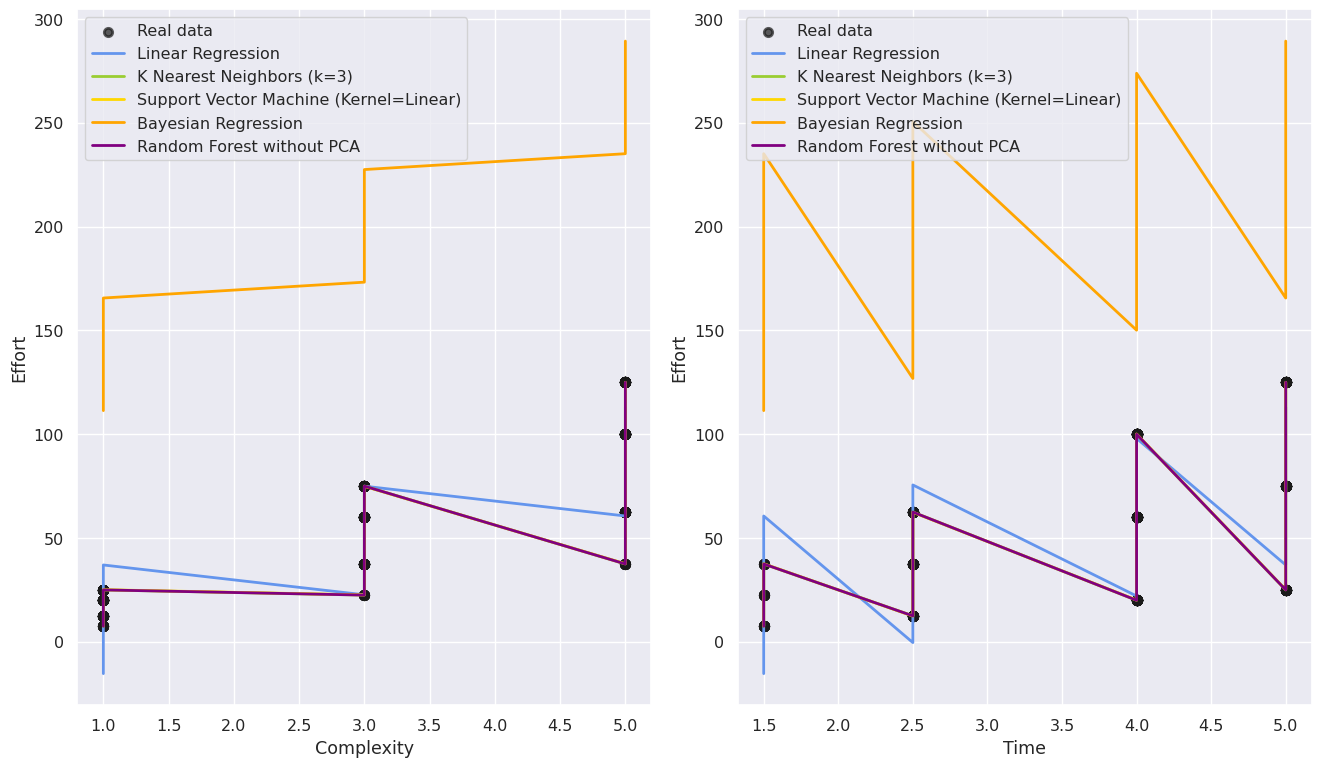

In [44]:
import matplotlib.pyplot as plt

# Define the features you want to visualize
features_to_visualize = max_corr_features[:6]  # Assuming you want to visualize the top 6 features

plt.figure(figsize=(20, 15))  # Mengatur ukuran gambar lebih besar

for i, feature in enumerate(features_to_visualize):
    plt.subplot(2, 3, i + 1)

    # Real data
    plt.scatter(X_test[feature], y_test, label='Real data', lw=2, alpha=0.7, c='k')

    # Linear Regression Model
    model_xs, model_ys = zip(*sorted(zip(X_test[feature], model.fit(X_train, y_train).predict(X_test))))
    plt.plot(model_xs, model_ys, lw=2, label='Linear Regression', c='cornflowerblue')

    # K-nearest Neighbors
    xs, ys = zip(*sorted(zip(X_test[feature], neigh_regularized.fit(X_train, y_train).predict(X_test))))
    plt.plot(xs, ys, lw=2, label='K Nearest Neighbors (k=3)', c='yellowgreen')

    # Support Vector Machine
    svc_model_xs, svc_model_ys = zip(*sorted(zip(X_test[feature], LinearSVC.fit(X_train, y_train).predict(X_test))))
    plt.plot(svc_model_xs, svc_model_ys, lw=2, label='Support Vector Machine (Kernel=Linear)', c='gold')

    # Bayesian Regression
    bayesian_xs, bayesian_ys = zip(*sorted(zip(X_test[feature], bayesian_model.predict(X_test))))
    plt.plot(bayesian_xs, bayesian_ys, lw=2, label='Bayesian Regression', c='orange')

    # Logistic Regression
    #logistic_xs, logistic_ys = zip(*sorted(zip(X_test[feature], logistic_model.predict(X_test))))
    #plt.plot(logistic_xs, logistic_ys, lw=2, label='Logistic Regression', c='red')

    # Random Forest Regression without PCA
    rf_xs_no_pca, rf_ys_no_pca = zip(*sorted(zip(X_test[feature], regressor.predict(X_test))))
    plt.plot(rf_xs_no_pca, rf_ys_no_pca, lw=2, label='Random Forest without PCA', c='purple')

    plt.xlabel(feature)
    plt.ylabel('Effort')
    plt.legend()

plt.tight_layout()
plt.show()


Perbandingan Prediksi Akurasi 25%

Perbandingan Prediksi Akurasi 25% and 50%

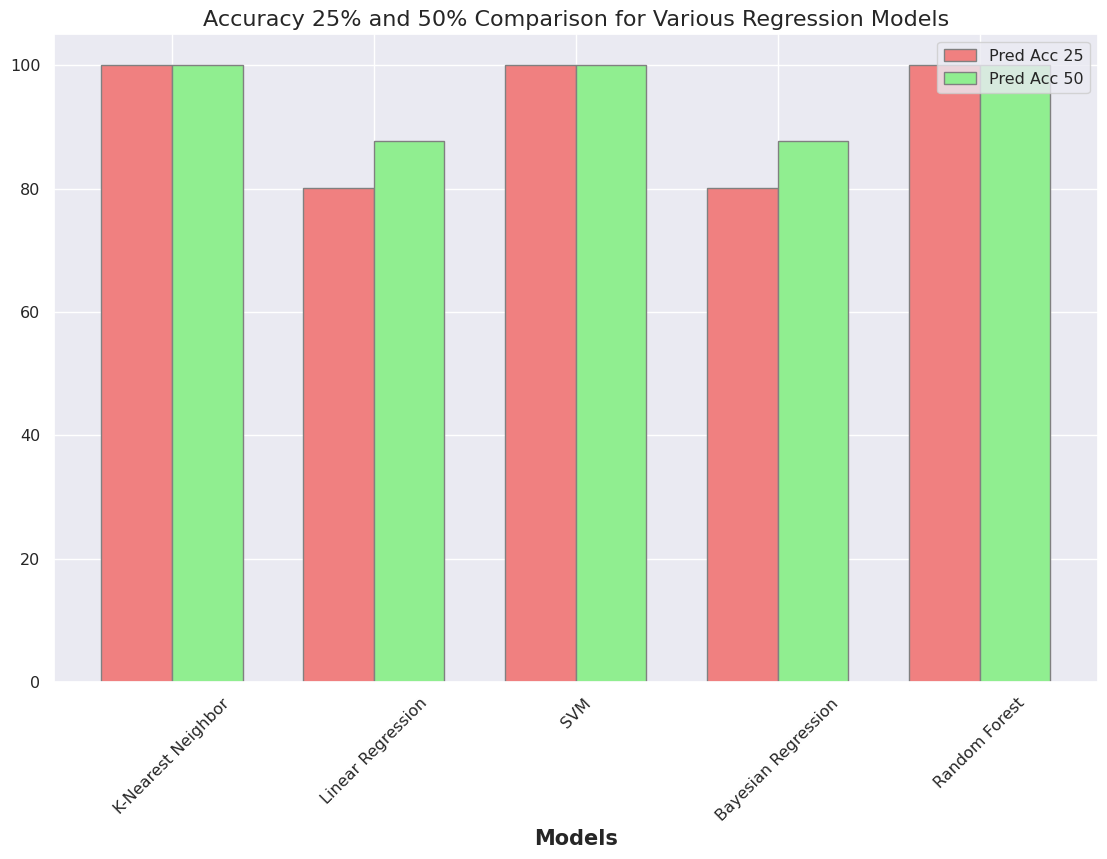

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Data untuk prediksi accuracy 25%
acc_25_values = [acc_25_knn, acc_25_linear, acc_25_svm, acc_25_bayesian, acc_25_rf]

# Data untuk prediksi accuracy 50%
acc_50_values = [acc_50_knn, acc_50_linear, acc_50_svm, acc_50_bayesian, acc_50_rf]

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest']

# Buat posisi untuk grup bar
bar_width = 0.35
r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))

# Plot untuk accuracy 25%
plt.bar(r1, acc_25_values, color='lightcoral', width=bar_width, edgecolor='grey', label='Pred Acc 25')

# Plot untuk accuracy 50%
plt.bar(r2, acc_50_values, color='lightgreen', width=bar_width, edgecolor='grey', label='Pred Acc 50')

# Atur label dan judul
plt.xlabel('Models', fontweight='bold', fontsize=15)
plt.xticks([r + bar_width/2 for r in range(len(models))], models, rotation=45)
plt.title('Accuracy 25% and 50% Comparison for Various Regression Models', fontsize=16)
plt.legend()

# Tampilkan grafik
plt.show()

Perbandingan Mean Square Error (MSE)

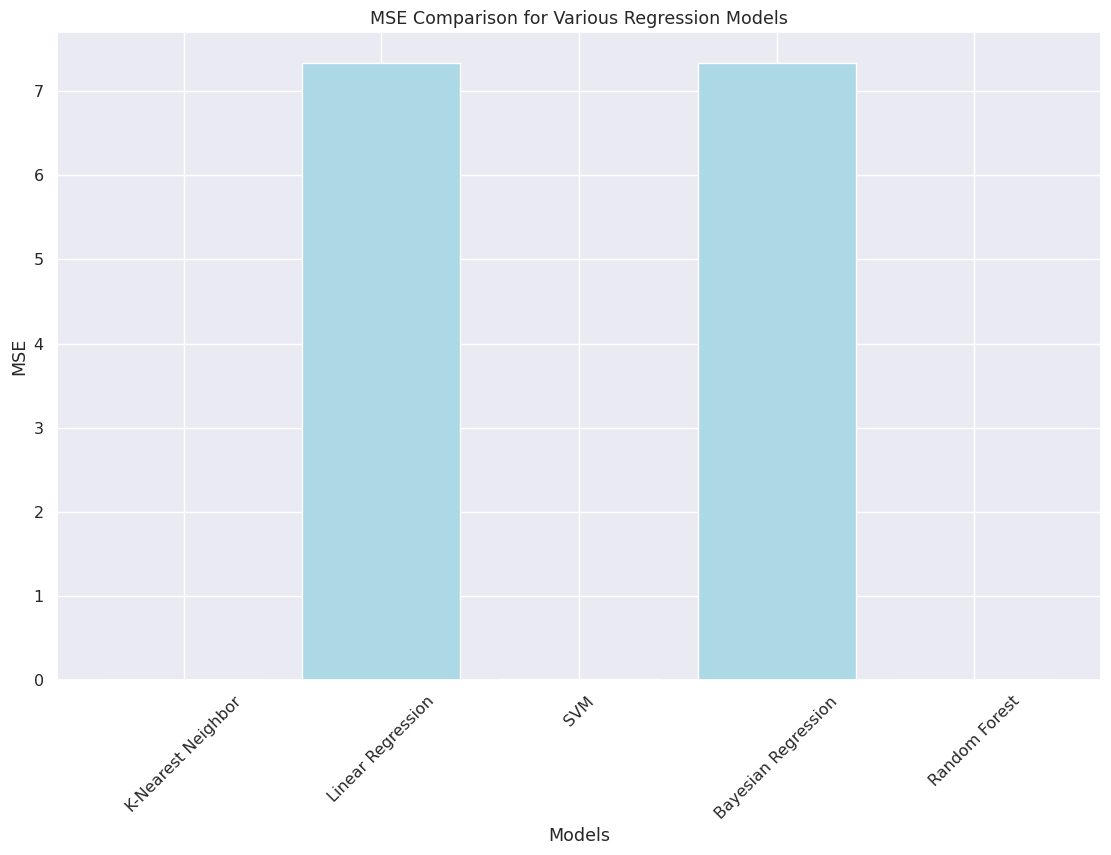

In [46]:
import matplotlib.pyplot as plt

# Hitung MSE untuk berbagai model
mse_values = []


mse_values.append(mse_knn)
mse_values.append(mse_linear)
mse_values.append(mse_svm)
mse_values.append(mse_bayesian)
mse_values.append(mse_rf)
#mse_values.append(mse_logistic)

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models, mse_values, color='lightblue')
plt.title('MSE Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.show()


Perbandingan Root Mean Square Error (RMSE)

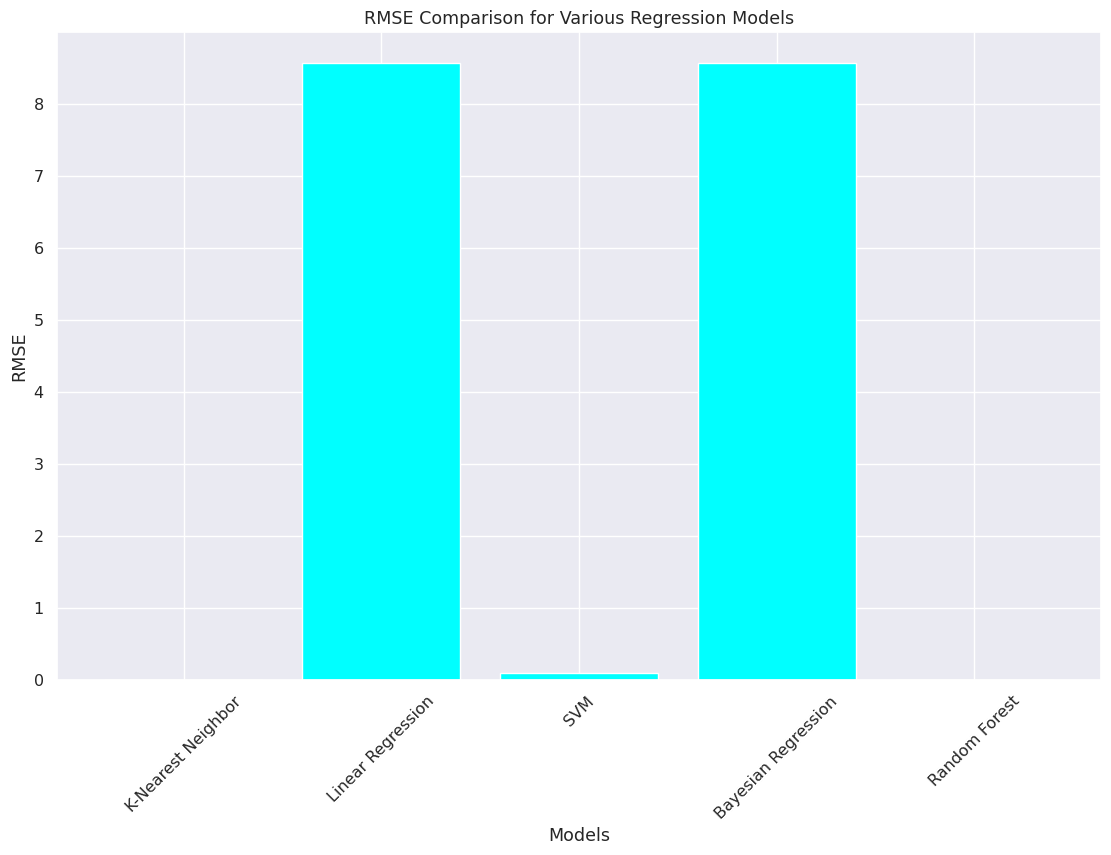

In [47]:
import matplotlib.pyplot as plt

# Hitung RMSE untuk berbagai model
rmse_values = []

rmse_values.append(rmse_knn)
rmse_values.append(rmse_linear)
rmse_values.append(rmse_svm)
rmse_values.append(rmse_bayesian)
rmse_values.append(rmse_rf)
#rmse_values.append(rmse_logistic)

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models, rmse_values, color='cyan')
plt.title('RMSE Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.xticks(rotation=45)
plt.show()


Perhitungan Mean Absolute Error (MAE)

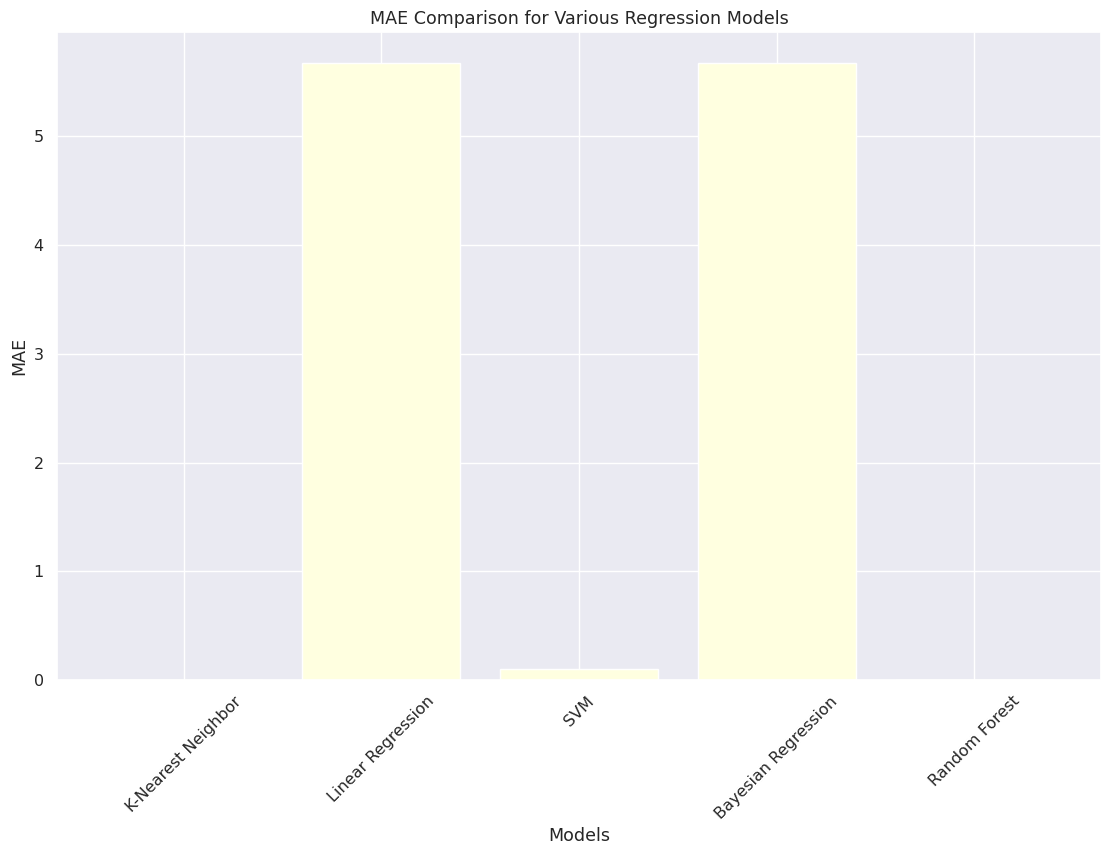

In [48]:
import matplotlib.pyplot as plt

# Hitung MAE untuk berbagai model
mae_values = []

mae_values.append(mae_knn)
mae_values.append(mae_linear)
mae_values.append(mae_svm)
mae_values.append(mae_bayesian)
mae_values.append(mae_rf)
#mae_values.append(mae_logistic)

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models, mae_values, color='lightyellow')
plt.title('MAE Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('MAE')
plt.xticks(rotation=45)
plt.show()


Perbandingan R Square

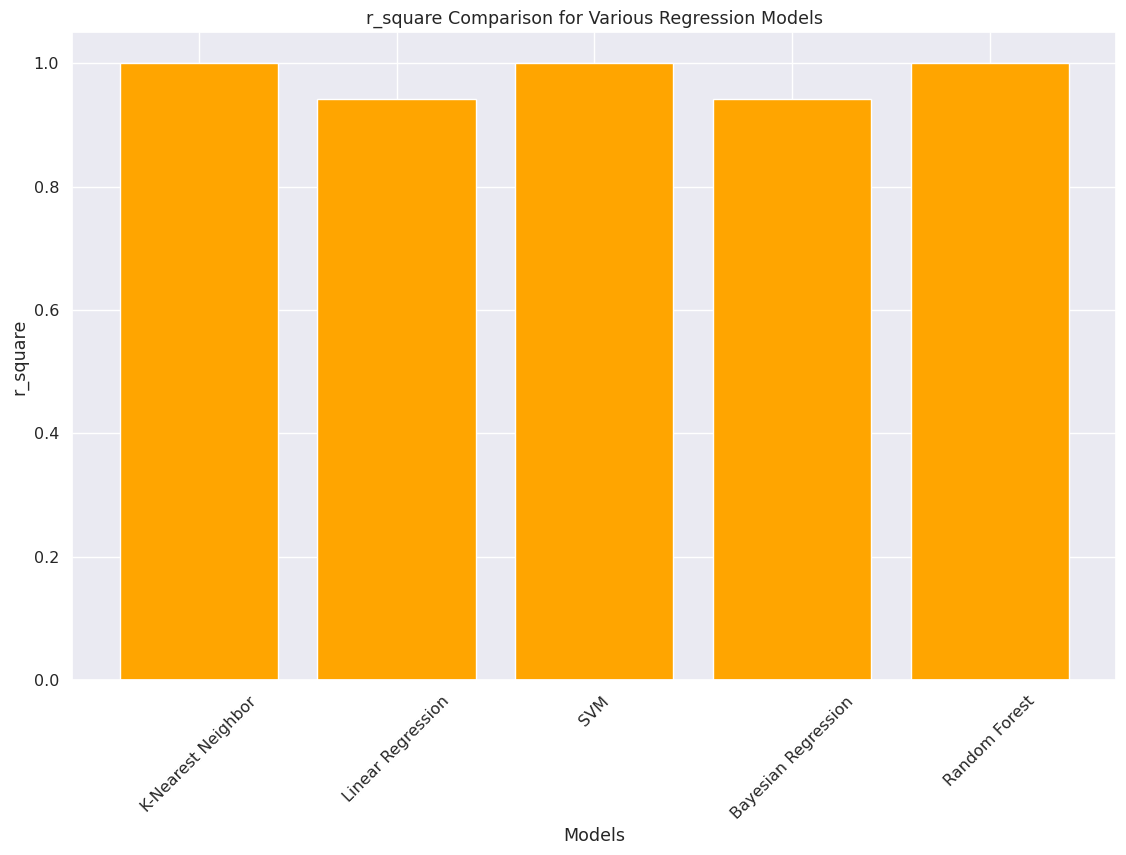

In [49]:
import matplotlib.pyplot as plt

# Hitung r square untuk berbagai model
r_square_values = []


r_square_values.append(r_square_knn)
r_square_values.append(r_square_linear)
r_square_values.append(r_square_svm)
r_square_values.append(r_square_bayesian)
r_square_values.append(r_square_rf)
#r_square_values.append(r_square_logistic)

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models, r_square_values, color='orange')
plt.title('r_square Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('r_square')
plt.xticks(rotation=45)
plt.show()


Perbandingan Mean Magnitude of Relative Error (MMRE)

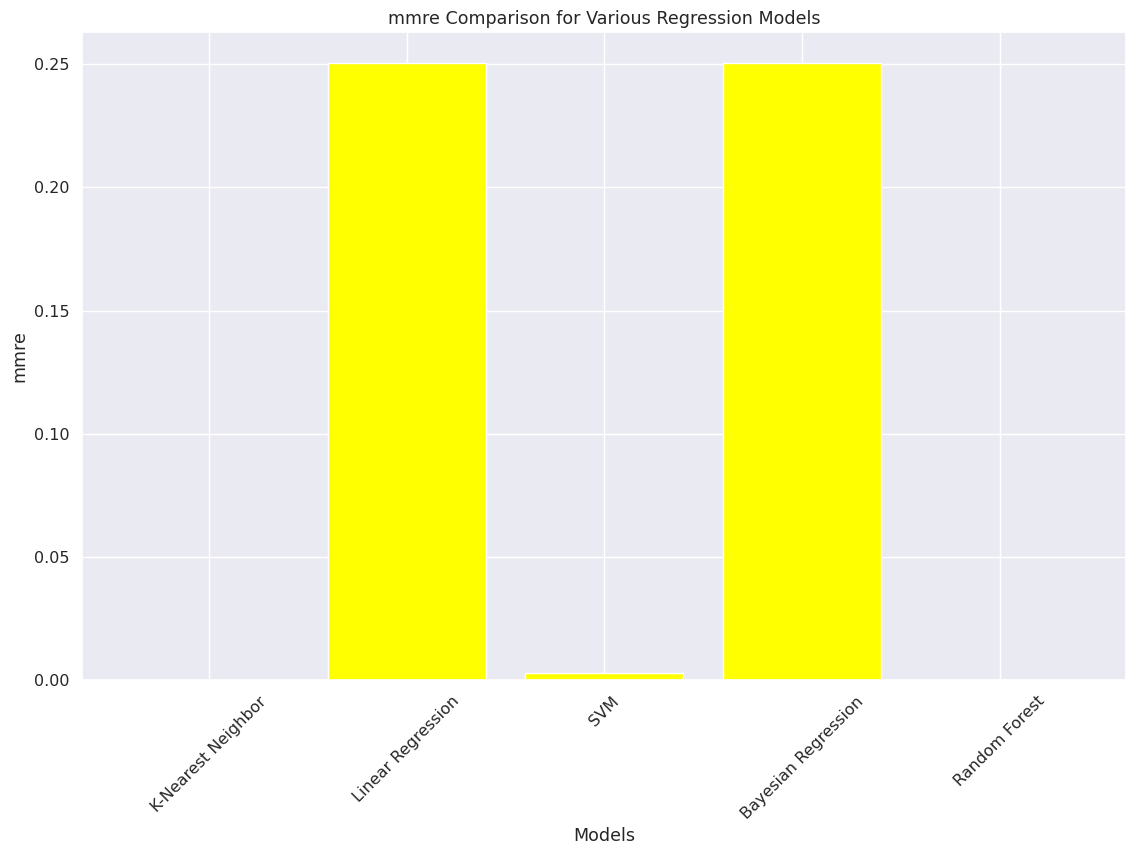

In [50]:
import matplotlib.pyplot as plt

# Hitung mmre untuk berbagai model
mmre_values = []

mmre_values.append(mmre_knn)
mmre_values.append(mmre_linear)
mmre_values.append(mmre_svm)
mmre_values.append(mmre_bayesian)
mmre_values.append(mmre_rf)
#mmre_values.append(mmre_logistic)

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models,mmre_values, color='yellow')
plt.title('mmre Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('mmre')
plt.xticks(rotation=45)
plt.show()


Perbandingan Median Magnitude of Relative Error (mdmre)

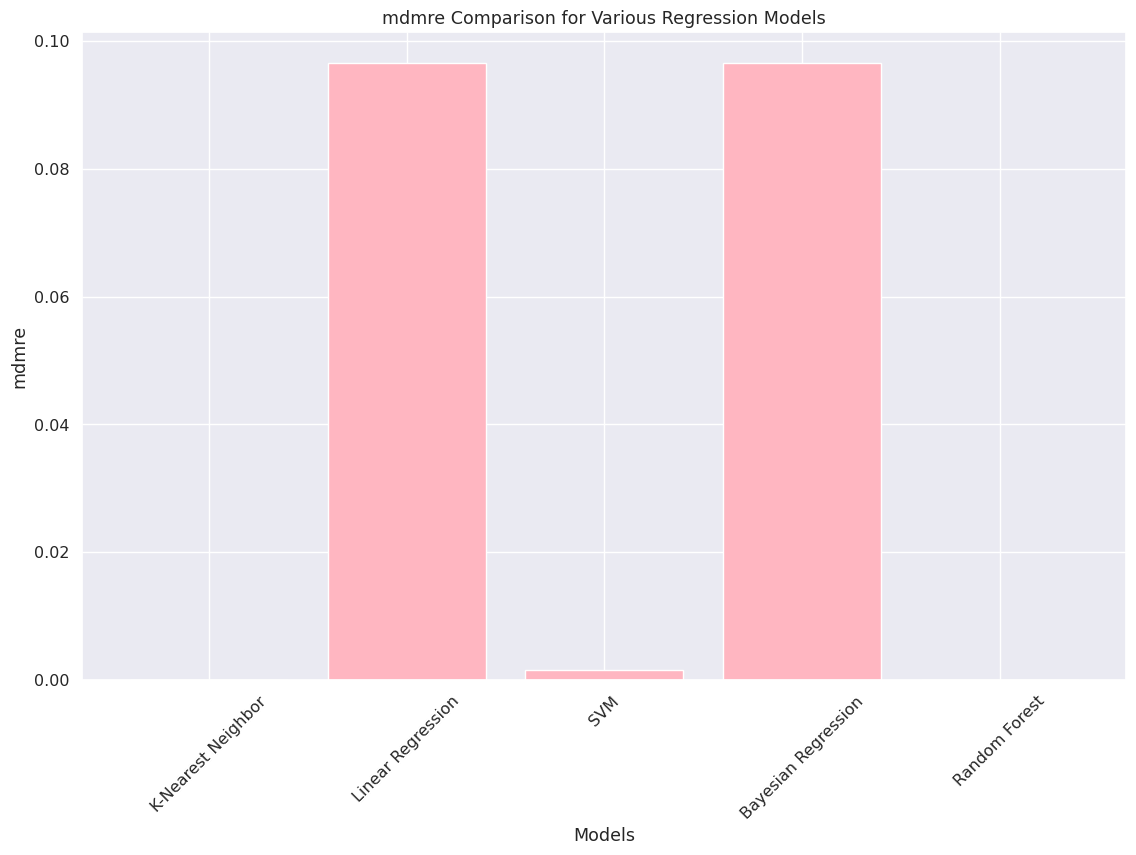

In [51]:
import matplotlib.pyplot as plt

# Hitung mdmre untuk berbagai model
mdmre_values = []


mdmre_values.append(mdmre_knn)
mdmre_values.append(mdmre_linear)
mdmre_values.append(mdmre_svm)
mdmre_values.append(mdmre_bayesian)
mdmre_values.append(mdmre_rf)
#mdmre_values.append(mdmre_logistic)

# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models,mdmre_values, color='lightpink')
plt.title('mdmre Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('mdmre')
plt.xticks(rotation=45)
plt.show()


Perbandingan Median Magnitude of Error Relative (MMER)

0.0


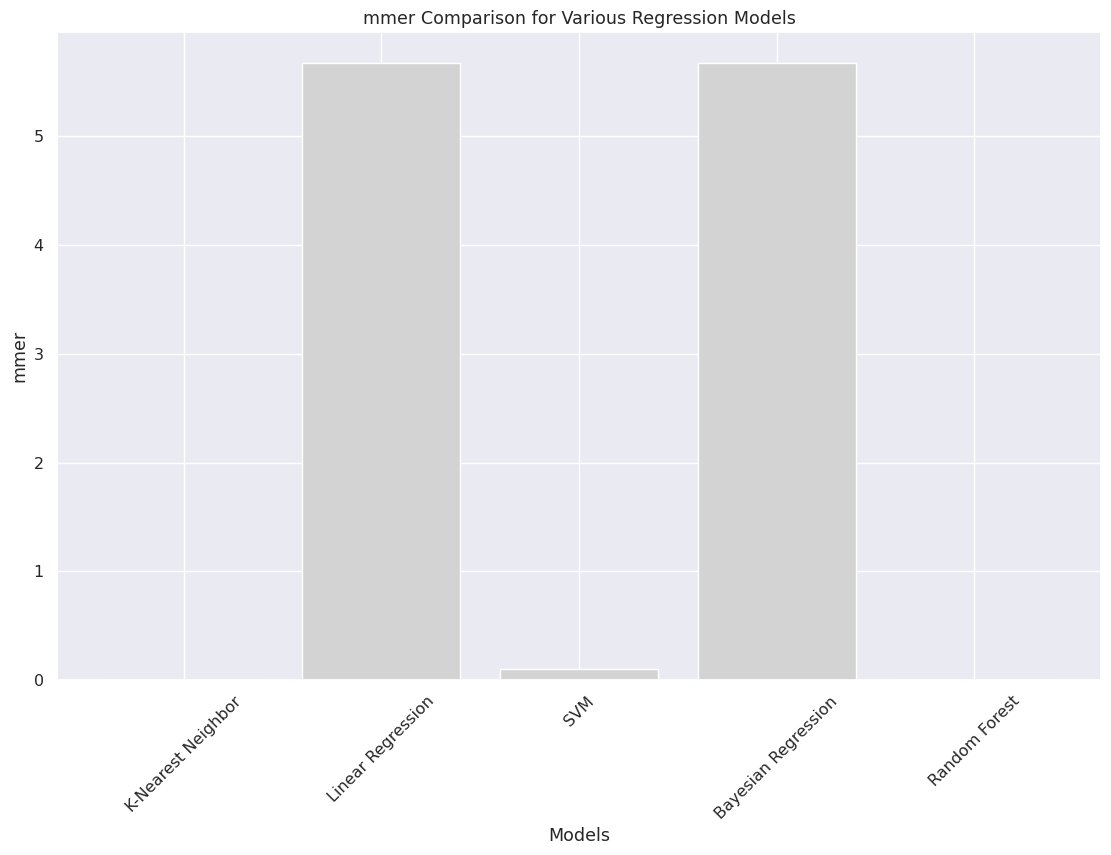

In [52]:
import matplotlib.pyplot as plt

# Hitung mdmre untuk berbagai model
mmer_values = []

mmer_values.append(mmer_knn)
mmer_values.append(mmer_linear)
mmer_values.append(mmer_svm)
mmer_values.append(mmer_bayesian)
mmer_values.append(mmer_rf)
#mmer_values.append(mmer_logistic)

print(mmer_knn)
# Daftar model
models = ['K-Nearest Neighbor', 'Linear Regression', 'SVM', 'Bayesian Regression', 'Random Forest']

# Buat grafik perbandingan RMSE
plt.figure(figsize=(12, 8))
plt.bar(models,mmer_values, color='lightgrey')
plt.title('mmer Comparison for Various Regression Models')
plt.xlabel('Models')
plt.ylabel('mmer')
plt.xticks(rotation=45)
plt.show()
